## 로지스틱 회귀

### 과소적합과 과대적합
- 이전까진 데이터가 선형으로 표현되는 매우 단순한 상황을 고려한 것임
- 실세계 데이터에서는 선형이 아닌경우가 많고 잡음도 섞임
- 비선형 모델이 필요

#### 과소적합(Underfitting)

<img src='https://raw.githubusercontent.com/hugoMGSung/study-pytorch/refs/heads/main/images/torch0005.png' width='700'>


- 선형모델(1차) 는 과소적합
- 비선형 모델을 사용하는 대안 - 2차 ~ 4차 등의 다항식 곡선을 회귀 모델로 선택
- 1차에 비해 데이터를 표현하는 오차가 크게 감소

#### 과대적합(Overfitting)

<img src='https://raw.githubusercontent.com/hugoMGSung/study-pytorch/refs/heads/main/images/torch0006.png' width='400'>

- 12차 모델의 경우 훈련집합에 대해서는 거의 완벽하게 근사
- 대신, 새로운 데이터를 예측할 때 큰 문제 발생
- 적절한 모델 선택 작업, 혹은 과대적합 방지하기 위한 작업 필요

##### 바이어스와 분산
- 3~4차 모델이 가장 일반적으로 사용됨
- bias - 바이어스, 데이터 <--> 회귀 모델들이 추정한 값 사이의 차이
- variance - 분산, 회귀 모델 곡선들의 모양의 유사한 정도

##### 과대적합 방지법
1. 데이터양 늘리기
    - 데이터의 일반적 패턴을 학습, 과대적합 방지
    
2. 모델의 복잡도 줄이기
    - 신경망 복잠도 -> 은닉층 혹은 매개변수 등으로 결정
    - 신경망 복잡도를 데이터양과 비교해 적절한 수준으로 설정

3. 가중치 규제
    - 기존의 비용함수에 가중치 규제값 추가

4. 드롭아웃
    - 학습과정에서 인공신경망의 일부를 사용하지 않는 방법

### 이진분류

- 성인여성의 나이와 혈압 데이터로 나이와 혈압이 선형관계에 있다고 가정. 선형회귀로 파라미터를 최적화

    $$ H(x) = wx + b $$

- 오차가 크지만 선형 모델로 표현은 가능함

#### 선형회귀 문제

- 성인여성 나이이 대한 암발병 여부를 데이터로 확인하면 이는 선형모델로 표현불가 -> 범주형 변수이기 때문

#### 시그모이드 함수
- 범주형 변수를 처리하기 위해서는 하나의 기준으로 두 값으로 나누는 함수가 필요
- Sigmoid 함수 == Logistic 함수 

    $$ logistic(z) = \sigma (z) = \frac{1}{1+ exp(-z)} $$


    <img src='https://raw.githubusercontent.com/hugoMGSung/study-pytorch/refs/heads/main/images/torch0007.png' width='600'>

#### 목적함수를 선형회귀와 동일하게 쓰면

- MSE(Mean Squared Error)를 로지스틱 회귀에 적용하면
    - 더 많은 에러를 갖는 상황발생
    - 더 큰에러를 가져 학습이 더딘 부정적 상황발생


#### 로지스틱 회귀에서는
- Cross Entropy(교차 엔트로피)를 사용


### 로지스틱 회귀

#### 실습 1

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [5]:
'''
nn.Model
- torch.nn 은 모델을 정의하고 미분하는데 autograd를 사용
- torch.nn.Module 은 각종 레이어와 출력을 반환하는 forward() 함수를 포함
nn.Sequential
- nn.Module 층을 차례로 쌓아서 모델을 구축할 때 이용
'''
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [7]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = model(x_train)   # 여기서는 추정모델로 Logistic(Sigmod)를 사용하겠다는 것
    cost = F.binary_cross_entropy(hypothesis, y_train)  # 크로스엔트로피를 목적(비용)함수로 

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측치가 0.5를 넘으면 True
        correct_prediction = prediction.float() == y_train # 실제값과 일치할 때만 True
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도
        print(f'Epoch {epoch:4d}/{nb_epochs} Cost :{cost.item():.6f} Accuracy {accuracy * 100:2.2f}%')

Epoch    0/1000 Cost :0.499737 Accuracy 66.67%
Epoch   10/1000 Cost :0.860215 Accuracy 66.67%
Epoch   20/1000 Cost :0.552684 Accuracy 83.33%
Epoch   30/1000 Cost :0.458169 Accuracy 83.33%
Epoch   40/1000 Cost :0.373566 Accuracy 83.33%
Epoch   50/1000 Cost :0.293956 Accuracy 83.33%
Epoch   60/1000 Cost :0.224519 Accuracy 83.33%
Epoch   70/1000 Cost :0.176150 Accuracy 100.00%
Epoch   80/1000 Cost :0.152924 Accuracy 100.00%
Epoch   90/1000 Cost :0.141157 Accuracy 100.00%
Epoch  100/1000 Cost :0.131760 Accuracy 100.00%
Epoch  110/1000 Cost :0.123569 Accuracy 100.00%
Epoch  120/1000 Cost :0.116354 Accuracy 100.00%
Epoch  130/1000 Cost :0.109951 Accuracy 100.00%
Epoch  140/1000 Cost :0.104230 Accuracy 100.00%
Epoch  150/1000 Cost :0.099088 Accuracy 100.00%
Epoch  160/1000 Cost :0.094441 Accuracy 100.00%
Epoch  170/1000 Cost :0.090220 Accuracy 100.00%
Epoch  180/1000 Cost :0.086370 Accuracy 100.00%
Epoch  190/1000 Cost :0.082842 Accuracy 100.00%
Epoch  200/1000 Cost :0.079599 Accuracy 100.00%

In [8]:
new_data = torch.Tensor([[4, 2]])
y_pred = model(new_data) >= torch.FloatTensor([0.5])
print(f'[4,2] 값에 대한 예측치 : {y_pred.int().item()}')

[4,2] 값에 대한 예측치 : 1


#### 실습 2 -  Iriz(붗꼿) 데이터셋

- 3종의 붓꽃
    - setosa : 0, vesicolor : 1, virginica : 2
    - 150개 샘플에 대한 4가지 특징 - 꽃받침 길이, 꽃받침 폭, 꽃잎 길이, 꽃잎 폭

In [10]:
!pip install -U scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.0 MB 11.7 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 19.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 18.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ------- -------------------------------- 7.9/44.8 MB 37.4 MB/s eta 0:00:01
   -------------- ------------------------- 16.8/44.8 MB 40.7 MB/s eta 0:00:01
   ------------------- -------------------- 22.3/44.8 MB 37.1 MB/s eta 0:00:01
   ------------------------- -------------- 28.3/44.8 MB 33.3 MB/s eta 0:00:01
   ---------------------------------- ----- 38.5/44.8 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------  44.6/44.8 MB 36.4 MB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 MB 33.9 MB/s eta 0:


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_iris   ## 붓꽃 데이터는 사이킷런에서 가져옴
import matplotlib.pyplot as plt

In [12]:
iris = load_iris()

In [21]:
x_train = iris.data[:100] ## 0과 1만 구분 가능하므로 3종 붓꽃 중 2종(100개)만 로드 / 꽃받침 길이, 폭, 꽃잎 길이, 폭
y_train = iris.target[:100] ## 붓꽃 종류 0또는 1
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_train = torch.unsqueeze(y_train, 1) ## dim=1에 차원 추가 (100,) -> (100, 1)

In [16]:
## Mini-batch 사이즈만큼 데이터를 추출해서 학습
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [19]:
model = nn.Sequential(
    nn.Linear(4, 1),    ## feature(특징) 4개, 1개의 출력값
    nn.Sigmoid()        ## 선형결합 + 시그모이드 함수
)

## Stochastic Gradient Descent 확률적 경사하강법
optimizer = optim.SGD(model.parameters(), lr=1)

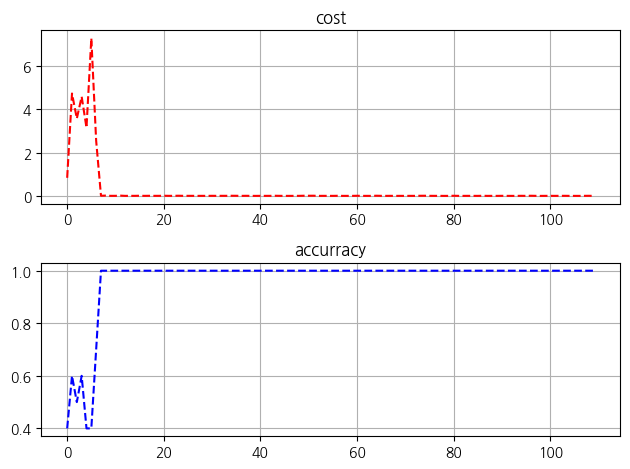

In [22]:
nb_epochs = 10
cost_history = []
accuracy_history = []

for epoch in range(nb_epochs + 1):
    for idx, (x_train, y_train) in enumerate(dataloader):
        hypothesis = model(x_train)
        ## Mini-batch단위 gradient 계산
        cost = F.binary_cross_entropy(hypothesis, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도
        cost_history.append(cost.item())
        accuracy_history.append(accuracy)

    
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.grid'] = True
fig, axes = plt.subplots(2, 1)
axes[0].plot(cost_history, 'r--')
axes[0].set_title('cost')
axes[1].plot(accuracy_history, 'b--')
axes[1].set_title('accurracy')

plt.tight_layout()
plt.show()

In [25]:
new_data = torch.Tensor([[4.9, 3, 1.5, 0.2]])
y_pred = model(new_data) >= torch.FloatTensor([[0.5]])
print(f'붓꽃값 [4.9, 3, 1.5, 0.2] 에서이 예측치 : {y_pred.int().item()}') ## 0은 setosa 붓꽃

붓꽃값 [4.9, 3, 1.5, 0.2] 에서이 예측치 : 0
